In [1]:
date_open_list = []
date_close_list = []
Pnl_list = []
execution_list = []

size_-1
trade_open_8513.8
size_0
trade_close_8513.8
---------------------------- TRADE ---------------------------------
1: Data Name:                            ^NSEI
2: Bar Num:                              21
3: Current date:                         2015-02-02
4: Status:                               Trade Complete
5: Ref:                                  1
6: PnL:                                  -253.47
7: dtopen:                               2015-01-16 00:00:00
8: dtclose:                               2015-02-02 00:00:00
9: datediff                                17
--------------------------------------------------------------------
size_1
trade_open_8711.7
size_0
trade_close_8711.7
---------------------------- TRADE ---------------------------------
1: Data Name:                            ^NSEI
2: Bar Num:                              29
3: Current date:                         2015-02-12
4: Status:                               Trade Complete
5: Ref:                        

1: Data Name:                            ^NSEI
2: Bar Num:                              531
3: Current date:                         2017-03-03
4: Status:                               Trade Complete
5: Ref:                                  67
6: PnL:                                  -4.3
7: dtopen:                               2017-02-20 00:00:00
8: dtclose:                               2017-03-03 00:00:00
9: datediff                                11
--------------------------------------------------------------------
size_-1
trade_open_8946.9
size_0
trade_close_8946.9
---------------------------- TRADE ---------------------------------
1: Data Name:                            ^NSEI
2: Bar Num:                              534
3: Current date:                         2017-03-08
4: Status:                               Trade Complete
5: Ref:                                  68
6: PnL:                                  26.5
7: dtopen:                               2017-03-07 00:00:00


6: PnL:                                  127.64
7: dtopen:                               2019-04-16 00:00:00
8: dtclose:                               2019-04-22 00:00:00
9: datediff                                6
--------------------------------------------------------------------
size_-1
trade_open_11748.15
size_0
trade_close_11748.15
---------------------------- TRADE ---------------------------------
1: Data Name:                            ^NSEI
2: Bar Num:                              1061
3: Current date:                         2019-05-03
4: Status:                               Trade Complete
5: Ref:                                  115
6: PnL:                                  48.53
7: dtopen:                               2019-04-30 00:00:00
8: dtclose:                               2019-05-03 00:00:00
9: datediff                                3
--------------------------------------------------------------------
size_-1
trade_open_11709.1
size_0
trade_close_11709.1
------

<IPython.core.display.Javascript object>


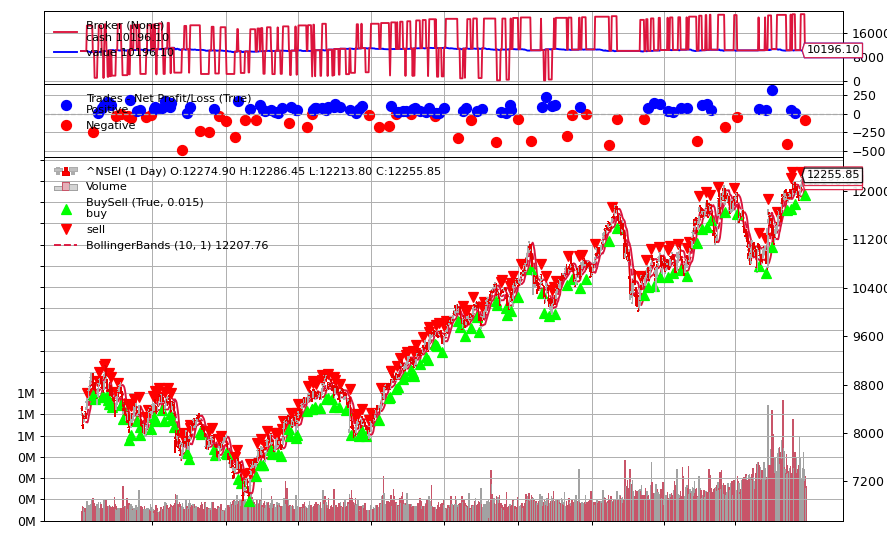

[[<Figure size 640x480 with 4 Axes>]]

In [3]:
import pandas as pd
import backtrader as bt
from datetime import datetime


class BOLLStrat(bt.Strategy):
    
    date_open_list = []
    date_close_list = []
    Pnl_list = []
    execution_list = []
    
    '''
    This is a simple mean reversion bollinger band strategy.

    Entry Critria:
        - Long:
            - Price closes below the lower band
        - Short:
            - Price closes above the upper band
    Exit Critria
        - Long/Short: Price touching the median line
    '''

    params = (
        ("period", 10),
        ("devfactor", 1),
        ("size", 1),
        ("debug", False)
        )

    def __init__(self):
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor)

    def next(self):

        orders = self.broker.get_orders_open()

        # Cancel open orders so we can track the median line
        if orders:
            for order in orders:
                self.broker.cancel(order)

        if not self.position:

            if self.data.close > self.boll.lines.top:

                self.sell(exectype=bt.Order.Close, size=self.p.size)
                print(data.close)
            if self.data.close < self.boll.lines.bot:
                self.buy(exectype=bt.Order.Close, size=self.p.size)
                print(data.close)

        else:


            if self.position.size > 0:
                self.sell(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)

            else:
                self.buy(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)

        if self.p.debug:
            print('---------------------------- NEXT ----------------------------------')
            print("1: Data Name:                            {}".format(data._name))
            print("2: Bar Num:                              {}".format(len(data)))
            print("3: Current date:                         {}".format(data.datetime.datetime()))
            print('4: Open:                                 {}'.format(data.open[0]))
            print('5: High:                                 {}'.format(data.high[0]))
            print('6: Low:                                  {}'.format(data.low[0]))
            print('7: Close:                                {}'.format(data.close[0]))
            print('8: Volume:                               {}'.format(data.volume[0]))
            print('9: Position Size:                       {}'.format(self.position.size))
            print('--------------------------------------------------------------------')

    def notify_trade(self,trade):
        if trade.isopen:
            print("size_{}".format(trade.size))
            print("trade_open_{}".format(trade.price))
            execution_list.append(trade.size)
            

    
        
        if trade.isclosed:
            print("size_{}".format(trade.size))
            print("trade_close_{}".format(trade.price))
            dt = self.data.datetime.date()
            
# history
# dtopen
# dtclose
            
            
            print('---------------------------- TRADE ---------------------------------')
            print("1: Data Name:                            {}".format(trade.data._name))
            print("2: Bar Num:                              {}".format(len(trade.data)))
            print("3: Current date:                         {}".format(dt))
            print('4: Status:                               Trade Complete')
            print('5: Ref:                                  {}'.format(trade.ref))
            print('6: PnL:                                  {}'.format(round(trade.pnl,2)))
            print('7: dtopen:                               {}'.format( datetime.fromordinal(round(trade.dtopen)-1 )))
            print('8: dtclose:                               {}'.format( datetime.fromordinal(round(trade.dtclose)-1 )))
            print('9: datediff                                {}'.format(round(trade.dtclose)- round(trade.dtopen)   ))
            print('--------------------------------------------------------------------')

            
            date_open_list.append(datetime.fromordinal(round(trade.dtopen)-1 ))
            date_close_list.append(datetime.fromordinal(round(trade.dtclose)-1 ))
            Pnl_list.append(round(trade.pnl,2))
            
            
            
#Variable for our starting cash
startcash = 10000

# Create an instance of cerebro
cerebro = bt.Cerebro()

# Add our strategy
cerebro.addstrategy(BOLLStrat)
# cerebro.optstrategy(BOLLStrat, period=[5,10,14,21,100] , devfactor = [0.5,1,1.5,2])
# cerebro.optstrategy(BOLLStrat, period=[10] , devfactor = [1])



data = bt.feeds.YahooFinanceData(
    dataname='^NSEI',
    fromdate = datetime(2015,1,1),
    todate = datetime(2019,12,31),
    buffered= True,
    )

# Add the data to Cerebro
cerebro.adddata(data)

# Add a sizer
cerebro.addsizer(bt.sizers.FixedReverser, stake=10)

# Run over everything
cerebro.run()

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

#Print out the final result 
print('Final Portfolio Value: ${}'.format(round(portvalue,2)))
print('P/L: ${}'.format(round(pnl,2)))

# Finally plot the end results
cerebro.plot(style='candlestick')

In [4]:


pnl_dict = {"date_open":date_open_list,
            "date_close":date_close_list,
            "Pnl":Pnl_list,
            "execution_type":execution_list} 

pnl_df= pd.DataFrame(pnl_dict)

In [9]:
pnl_df.to_csv(r'C:\Users\wann\export_dataframe.csv')


In [7]:
pnl_df

,date_open,date_close,Pnl,execution_type
0,2015-01-16,2015-02-02,-253.47,-1
1,2015-02-05,2015-02-12,1.39,1
2,2015-02-16,2015-02-24,69.49,-1
3,2015-02-27,2015-03-02,109.25,1
4,2015-03-03,2015-03-09,150.27,-1
...,...,...,...,...
119,2019-09-23,2019-10-01,317.81,-1
120,2019-10-16,2019-11-11,-408.76,-1
121,2019-11-21,2019-11-22,45.02,-1
122,2019-11-26,2019-12-03,8.75,-1


# TUNING 

In [5]:
devfactor_tune = [0.5,1,1.5,2]
period_tune = [10,21,50,100]


for i in period_tune:
    for j in devfactor_tune:
                import pandas as pd
                import backtrader as bt

                from datetime import datetime

                

                

                class BOLLStrat(bt.Strategy):

                

                    '''

                    This is a simple mean reversion bollinger band strategy.

                

                    Entry Critria:

                        - Long:

                            - Price closes below the lower band

                        - Short:

                            - Price closes above the upper band

                    Exit Critria

                        - Long/Short: Price touching the median line

                    '''

                

                    params = (

                        ("period", i),

                        ("devfactor", j),

                        ("size", 1),

                        ("debug", False)

                        )

                

                    def __init__(self):

                        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor)

                

                    def next(self):

                

                        orders = self.broker.get_orders_open()

                

                        # Cancel open orders so we can track the median line

                        if orders:

                            for order in orders:

                                self.broker.cancel(order)

                

                        if not self.position:

                

                            if self.data.close > self.boll.lines.top:

                

                                self.sell(exectype=bt.Order.Close, size=self.p.size)

                                #print(data.close)

                            if self.data.close < self.boll.lines.bot:

                                self.buy(exectype=bt.Order.Close, size=self.p.size)

                                #print(data.close)

                

                        else:

                

                

                            if self.position.size > 0:

                                self.sell(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)

                

                            else:

                                self.buy(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)

                

                        if self.p.debug:

                            print('---------------------------- NEXT ----------------------------------')

                            print("1: Data Name:                            {}".format(data._name))

                            print("2: Bar Num:                              {}".format(len(data)))

                            print("3: Current date:                         {}".format(data.datetime.datetime()))

                            print('4: Open:                                 {}'.format(data.open[0]))

                            print('5: High:                                 {}'.format(data.high[0]))

                            print('6: Low:                                  {}'.format(data.low[0]))

                            print('7: Close:                                {}'.format(data.close[0]))

                            print('8: Volume:                               {}'.format(data.volume[0]))

                            print('9: Position Size:                       {}'.format(self.position.size))

                            print('--------------------------------------------------------------------')

                

                

                            

                            

                #Variable for our starting cash

                startcash = 10000

                

                # Create an instance of cerebro

                cerebro = bt.Cerebro()

                

                # Add our strategy

                cerebro.addstrategy(BOLLStrat)

                # cerebro.optstrategy(BOLLStrat, period=[5,10,14,21,100] , devfactor = [0.5,1,1.5,2])

                # cerebro.optstrategy(BOLLStrat, period=[10] , devfactor = [1])

                

                

                

                data = bt.feeds.YahooFinanceData(

                    dataname='^NSEI',

                    fromdate = datetime(2015,1,1),

                    todate = datetime(2019,12,31),

                    buffered= True,

                    )

                

                # Add the data to Cerebro

                cerebro.adddata(data)

                

                # Add a sizer

                cerebro.addsizer(bt.sizers.FixedReverser, stake=10)

                

                # Run over everything

                cerebro.run()

                

                #Get final portfolio Value

                portvalue = cerebro.broker.getvalue()

                pnl = portvalue - startcash

                

                #Print out the final result 
                print('period_{}'.format(i))
                print('devfactor_{}'.format(j))
                print('Final Portfolio Value: ${}'.format(round(portvalue,2)))

                print('P/L: ${}'.format(round(pnl,2)))

                

                # Finally plot the end results

                # cerebro.plot(style='candlestick')
    

period_10
devfactor_0.5
Final Portfolio Value: $11909.44
P/L: $1909.44
period_10
devfactor_1
Final Portfolio Value: $10196.1
P/L: $196.1
period_10
devfactor_1.5
Final Portfolio Value: $12186.08
P/L: $2186.08
period_10
devfactor_2
Final Portfolio Value: $11597.64
P/L: $1597.64
period_21
devfactor_0.5
Final Portfolio Value: $9474.11
P/L: $-525.89
period_21
devfactor_1
Final Portfolio Value: $9619.64
P/L: $-380.36
period_21
devfactor_1.5
Final Portfolio Value: $10904.75
P/L: $904.75
period_21
devfactor_2
Final Portfolio Value: $11426.64
P/L: $1426.64
period_50
devfactor_0.5
Final Portfolio Value: $9165.66
P/L: $-834.34
period_50
devfactor_1
Final Portfolio Value: $10767.9
P/L: $767.9
period_50
devfactor_1.5
Final Portfolio Value: $10893.08
P/L: $893.08
period_50
devfactor_2
Final Portfolio Value: $10558.98
P/L: $558.98
period_100
devfactor_0.5
Final Portfolio Value: $9210.37
P/L: $-789.63
period_100
devfactor_1
Final Portfolio Value: $9559.13
P/L: $-440.87
period_100
devfactor_1.5
Final P